## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the Data

In [2]:
raw_data_train = pd.read_csv('train.csv')
raw_data_test = pd.read_csv('test.csv')

In [3]:
data_train = raw_data_train.copy()
data_test = raw_data_test.copy()

In [4]:
data_train = data_train.set_index('Id')

In [5]:
data_test = data_test.set_index('Id')

In [6]:
def calc_datatypes(df):
    dtypes = {}
    for column_name in df:
        x = str(df[column_name].dtype)
        dtypes[x] = dtypes.get(x, 0) + 1
    return dtypes

In [7]:
calc_datatypes(data_train),calc_datatypes(data_test)

({'int64': 34, 'object': 43, 'float64': 3},
 {'int64': 25, 'object': 43, 'float64': 11})

In [8]:
train_null_columns = data_train.columns[data_train.isnull().sum() > 0]
test_null_columns = data_test.columns[data_test.isnull().sum() > 0]

In [9]:
data_train[train_null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
data_test[test_null_columns].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [11]:
# Columns need to be removed (Alley,PoolQC,Fence,MiscFeature,FireplaceQu)
# As we found one null value in electrical column it will be removed

In [12]:
data_train = data_train.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1)
data_test = data_test.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis = 1)

In [13]:
train_null_columns_updated = data_train.columns[data_train.isnull().sum() > 0]
test_null_columns_updated = data_test.columns[data_test.isnull().sum() > 0]

In [14]:
data_train[train_null_columns_updated].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [15]:
data_test[test_null_columns_updated].isnull().sum()

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrType       16
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64

## Filling Categorical data with the most common value

In [16]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna(data_train['MasVnrType'].value_counts().index[0])
data_train['BsmtQual'] = data_train['BsmtQual'].fillna(data_train['BsmtQual'].value_counts().index[0])
data_train['BsmtCond'] = data_train['BsmtCond'].fillna(data_train['BsmtCond'].value_counts().index[0])
data_train['BsmtExposure'] = data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].value_counts().index[0])
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].fillna(data_train['BsmtFinType1'].value_counts().index[0])
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].value_counts().index[0])
data_train['GarageType'] = data_train['GarageType'].fillna(data_train['GarageType'].value_counts().index[0])
data_train['GarageFinish'] = data_train['GarageFinish'].fillna(data_train['GarageFinish'].value_counts().index[0])
data_train['GarageQual'] = data_train['GarageQual'].fillna(data_train['GarageQual'].value_counts().index[0])
data_train['GarageCond'] = data_train['GarageCond'].fillna(data_train['GarageCond'].value_counts().index[0])

In [17]:
data_train[train_null_columns_updated].isnull().sum()

LotFrontage     259
MasVnrType        0
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        1
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
dtype: int64

In [18]:
data_test.fillna(data_test.select_dtypes(include='object').mode().iloc[0],inplace=True)

In [19]:
data_test[test_null_columns_updated].isnull().sum()

MSZoning          0
LotFrontage     227
Utilities         0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea       15
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        1
BsmtFinType2      0
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       0
Functional        0
GarageType        0
GarageYrBlt      78
GarageFinish      0
GarageCars        1
GarageArea        1
GarageQual        0
GarageCond        0
SaleType          0
dtype: int64

#### Filling null numerical values with acceptable value

In [20]:
mean_LotFrontage = np.nanmean(data_train['LotFrontage'])
mean_MasVnrArea = np.nanmean(data_train['MasVnrArea'])
mean_GarageYrBlt = np.nanmean(data_train['GarageYrBlt'])

In [21]:
data_train['LotFrontage'] = data_train['LotFrontage'].fillna(mean_LotFrontage)
data_train['MasVnrArea'] = data_train['MasVnrArea'].fillna(mean_MasVnrArea)
data_train['GarageYrBlt'] = data_train['GarageYrBlt'].fillna(mean_GarageYrBlt)

In [22]:
data_train= data_train.dropna(axis=0)

In [23]:
data_train[train_null_columns_updated].isnull().sum()

LotFrontage     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [24]:
data_test.fillna(data_test.select_dtypes(include='number').mean().iloc[0], inplace=True)

In [25]:
data_test[test_null_columns_updated].isnull().sum()

MSZoning        0
LotFrontage     0
Utilities       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
KitchenQual     0
Functional      0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
GarageQual      0
GarageCond      0
SaleType        0
dtype: int64

## Check Point 1

In [26]:
data_train_cleaned = data_train.copy()

In [27]:
data_test_cleaned = data_test.copy()

## Feature Engineering

In [28]:
numeric_columns_train = [column_names for column_names in data_train_cleaned.columns if data_train_cleaned[column_names].dtypes != 'object'
                        and 'Yr' not in column_names and 'Year' not in column_names]
len(numeric_columns_train)

33

In [29]:
numeric_columns_test =[column_names for column_names in data_test_cleaned.columns if data_test_cleaned[column_names].dtypes != 'object'
                        and 'Yr' not in column_names and 'Year' not in column_names]
len(numeric_columns_test)

32

In [30]:
discrete_columns_train = [columns for columns in numeric_columns_train if len(data_train_cleaned[columns].unique()) < 25]
len(discrete_columns_train)

17

In [31]:
discrete_columns_test = [columns for columns in numeric_columns_test if len(data_test_cleaned[columns].unique()) < 25]
len(discrete_columns_test)

16

In [32]:
data_train_cleaned.groupby(by='OverallCond')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
OverallCond,,,,,,,,
1,1.0,61000.000000,NaN,61000.0,61000.0,61000.0,61000.00,61000.0
2,5.0,141986.400000,141342.813488,67000.0,76500.0,85000.0,87000.00,394432.0
3,25.0,101929.400000,44852.490403,35311.0,76000.0,89500.0,135000.00,200624.0
4,57.0,120438.438596,38922.525907,40000.0,92900.0,115000.0,143000.00,235000.0
5,820.0,203190.386585,85160.147638,34900.0,143975.0,185250.0,239714.25,745000.0
6,252.0,153961.591270,60737.969824,37900.0,124375.0,142750.0,171875.00,755000.0
7,205.0,158145.487805,53468.189431,79900.0,123500.0,145000.0,178000.00,402000.0
8,72.0,155651.736111,52375.144681,84500.0,125375.0,142500.0,170750.00,335000.0
9,22.0,216004.545455,96485.974689,110500.0,143500.0,176200.0,287875.00,475000.0


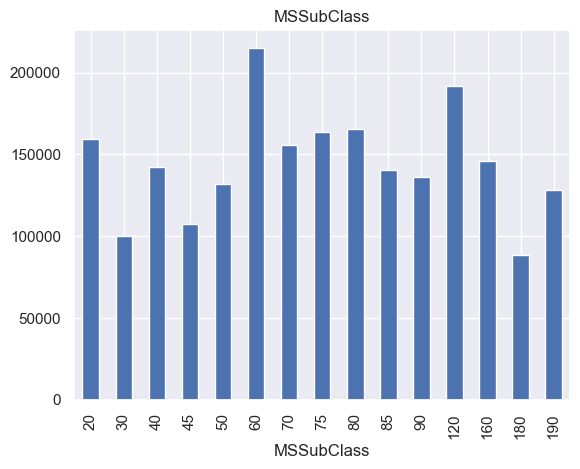

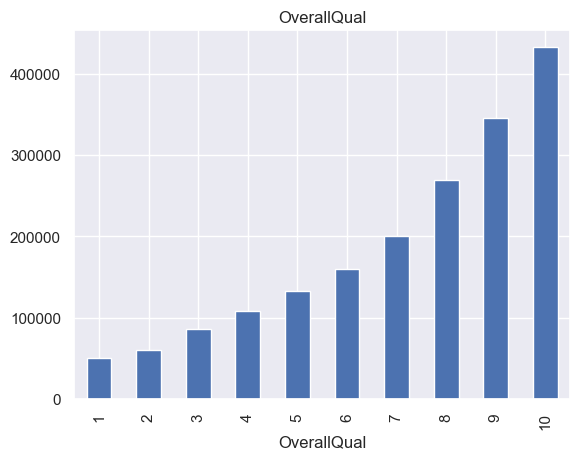

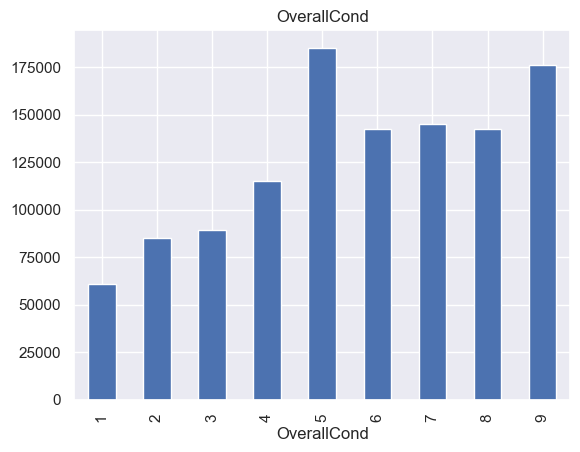

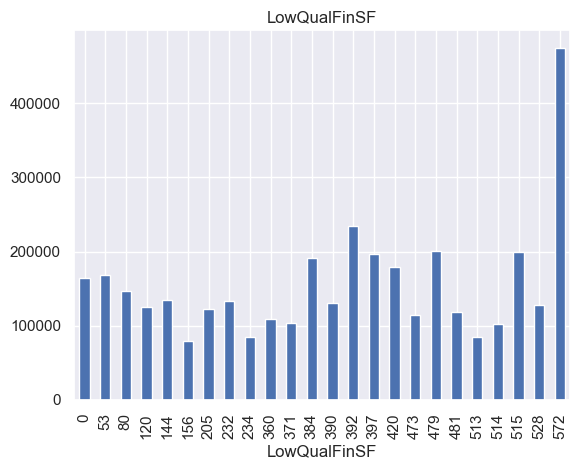

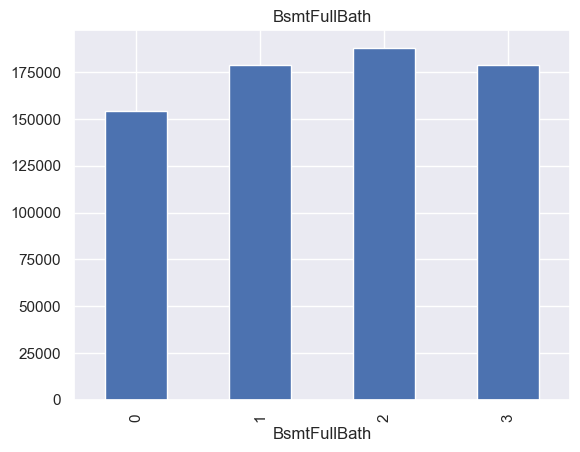

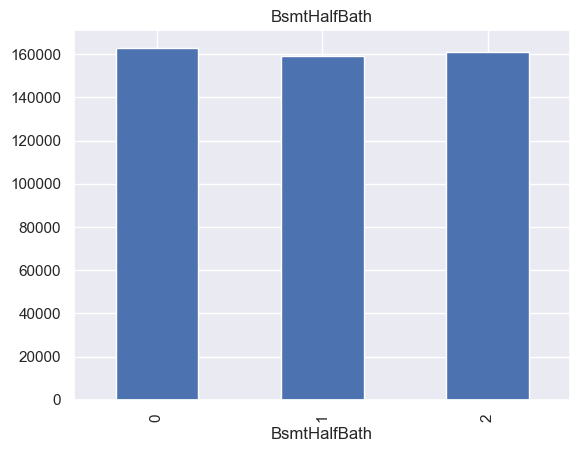

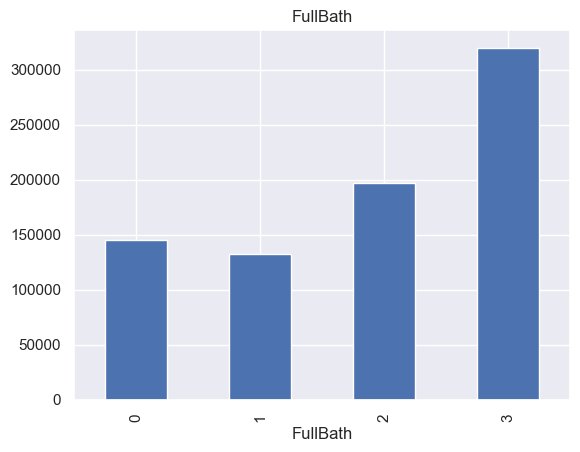

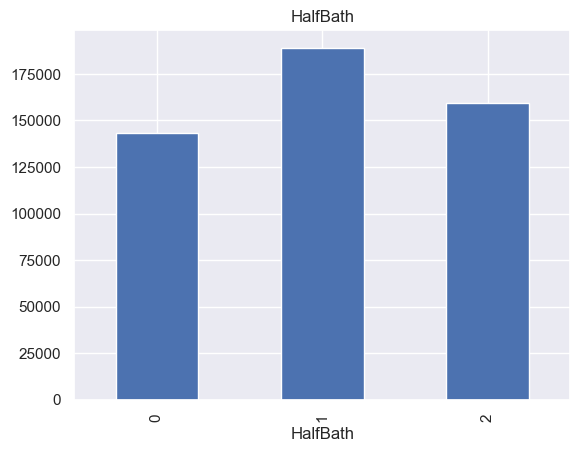

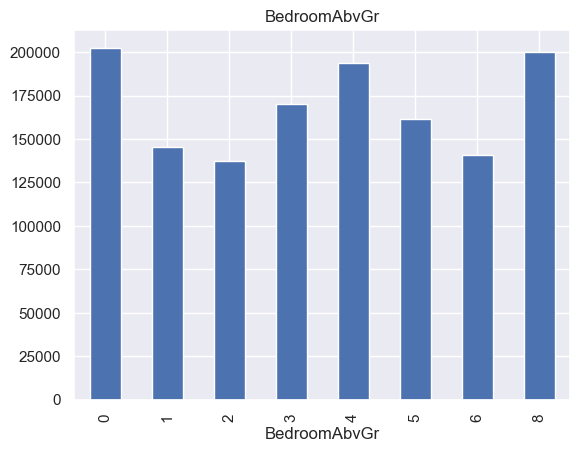

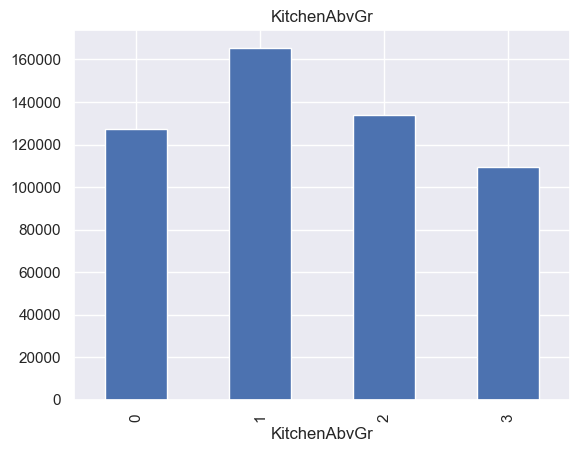

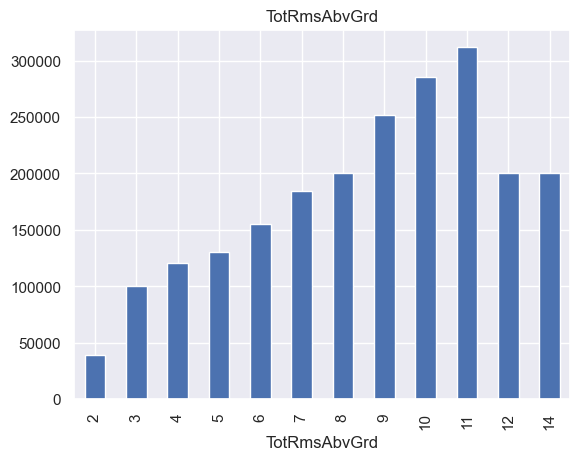

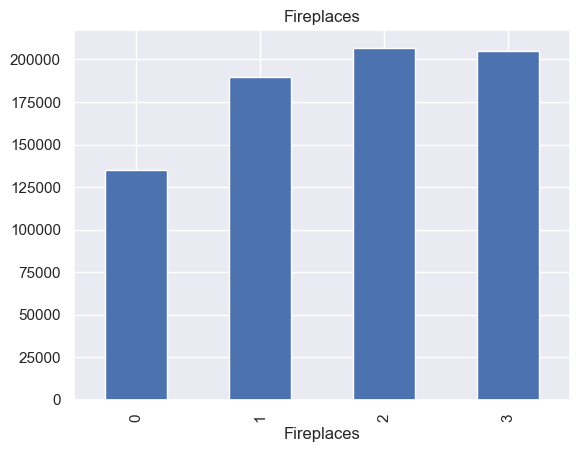

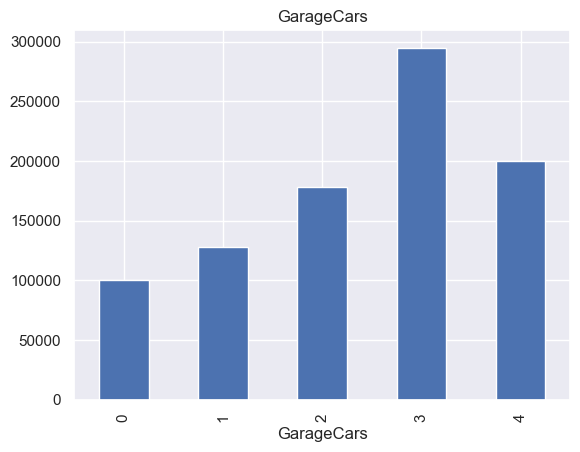

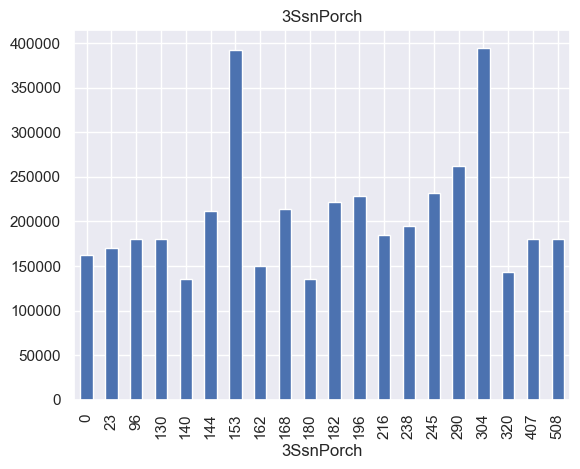

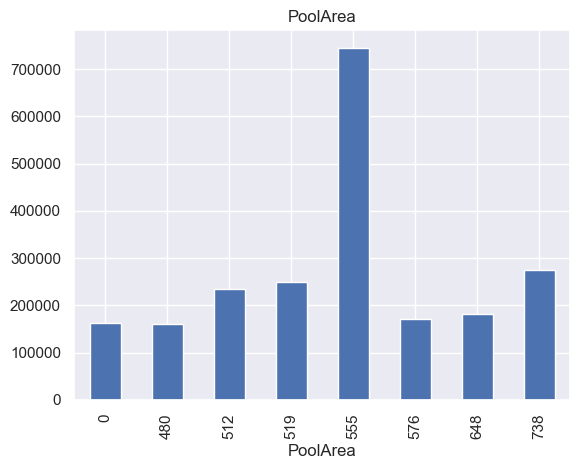

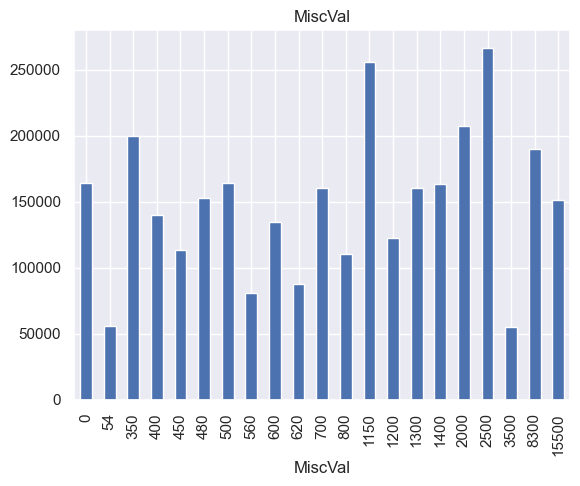

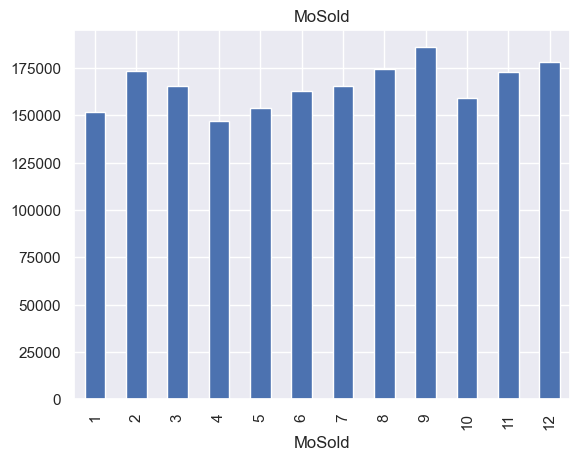

In [33]:
for i in discrete_columns_train:
    data_train_cleaned.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.show()

In [34]:
continious_columns_train = [i for i in numeric_columns_train if i not in discrete_columns_train]
len(continious_columns_train)

16

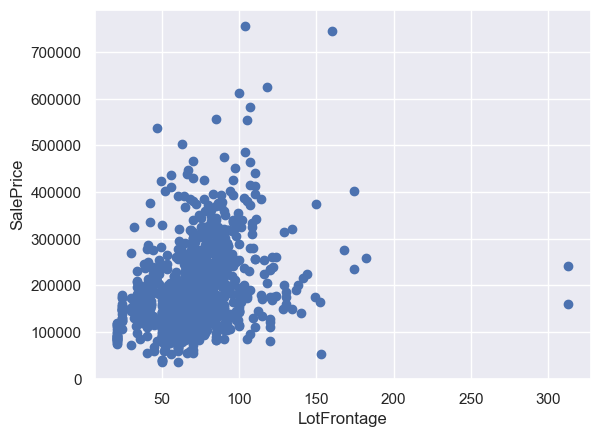

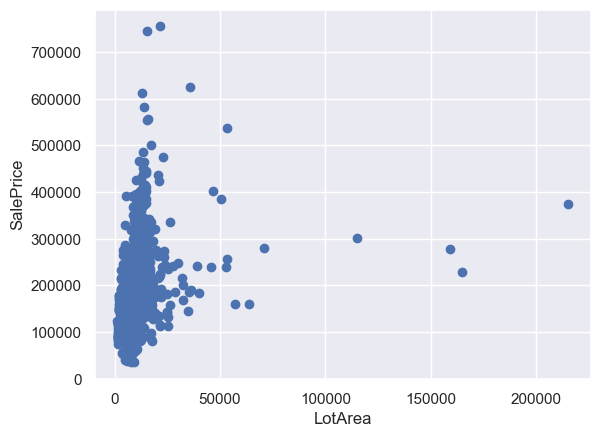

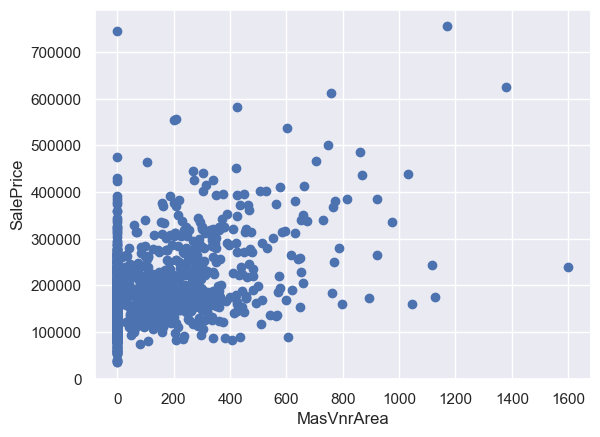

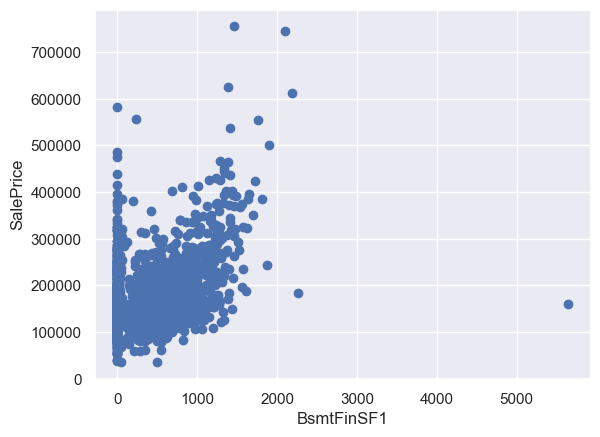

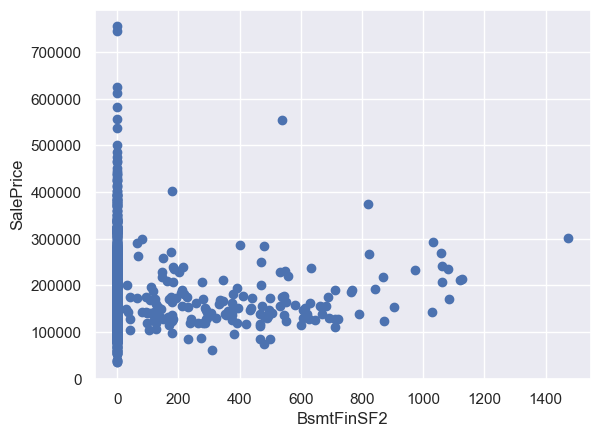

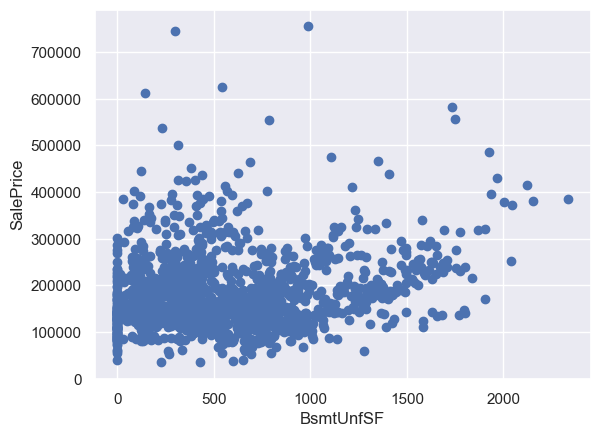

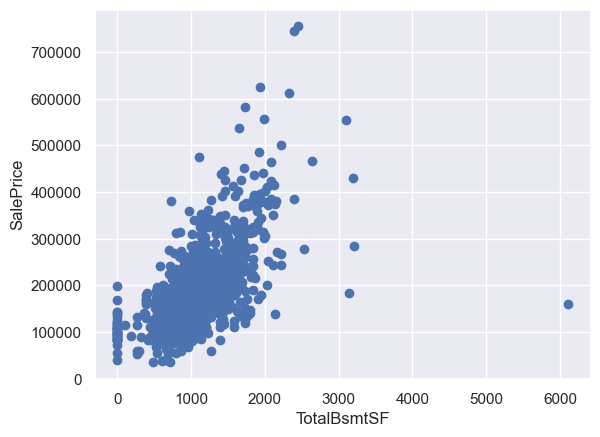

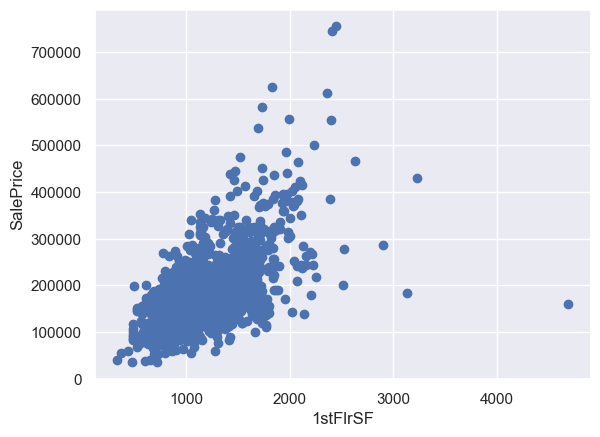

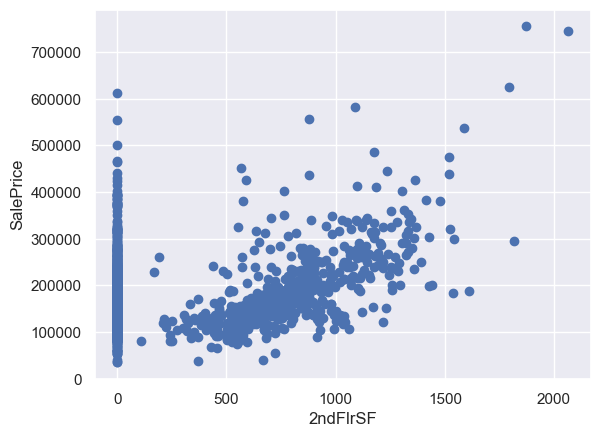

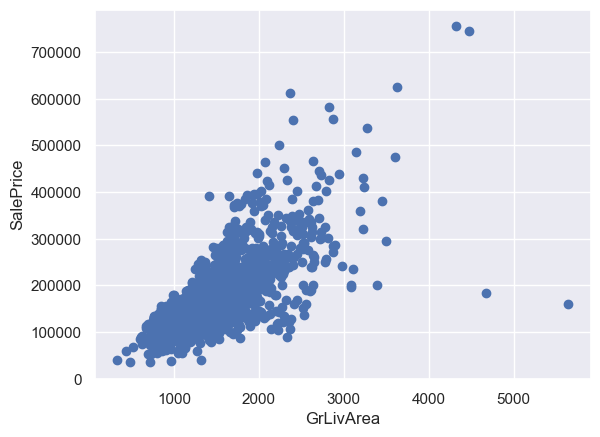

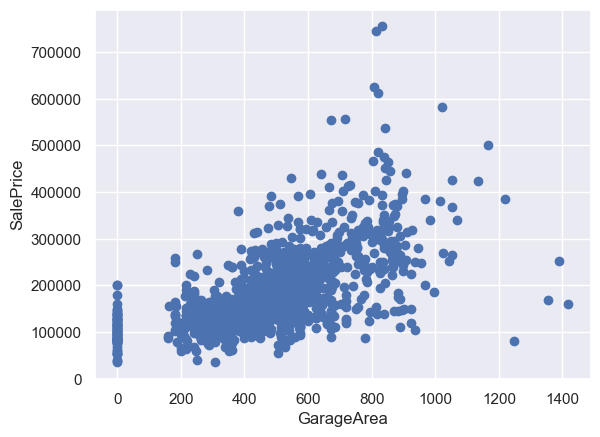

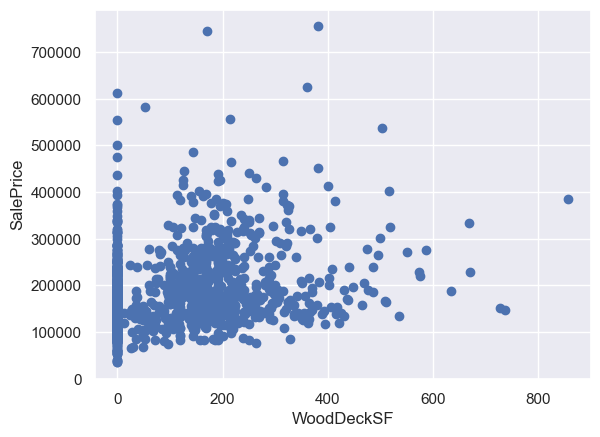

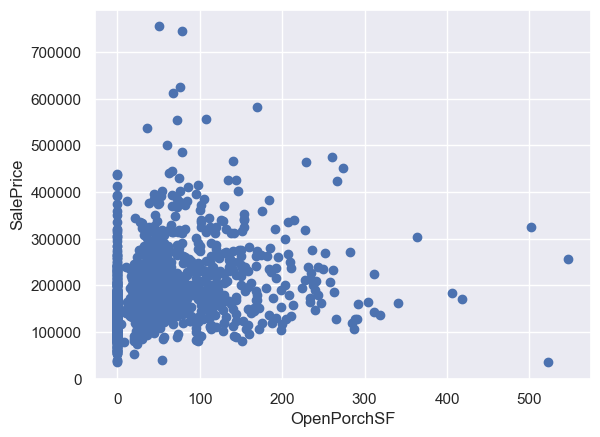

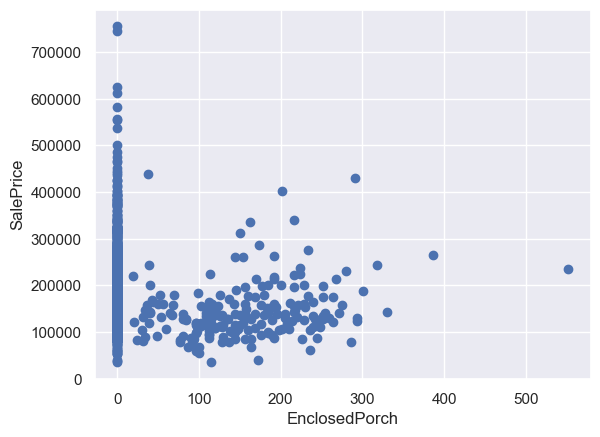

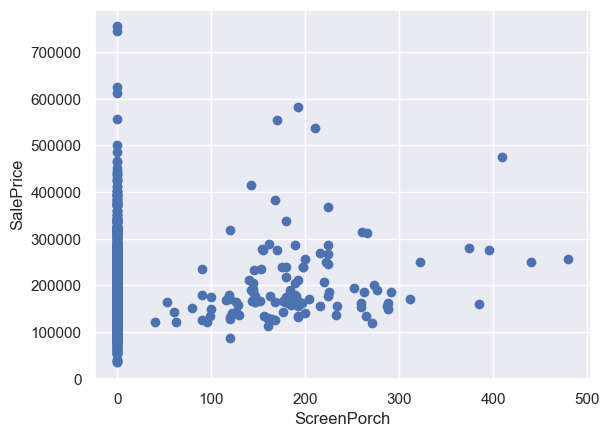

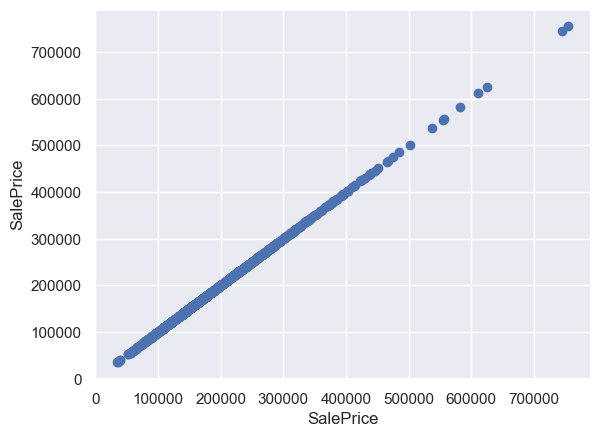

In [35]:
for i in continious_columns_train:
    plt.scatter(data_train_cleaned[i],data_train_cleaned['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

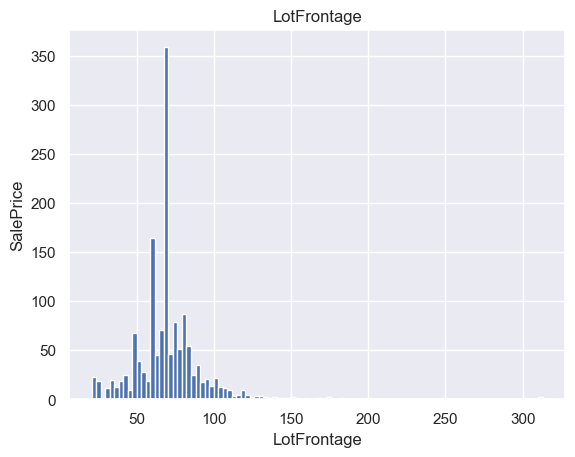

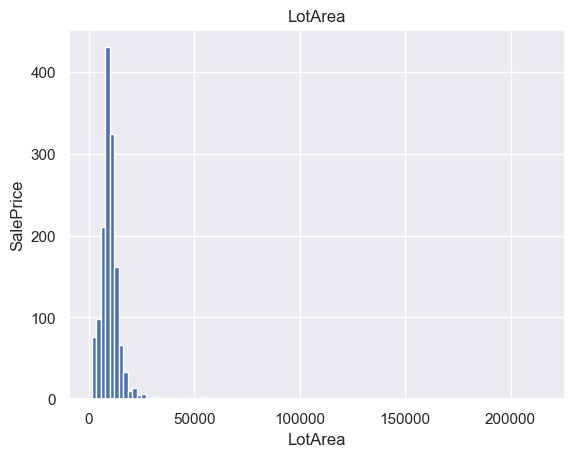

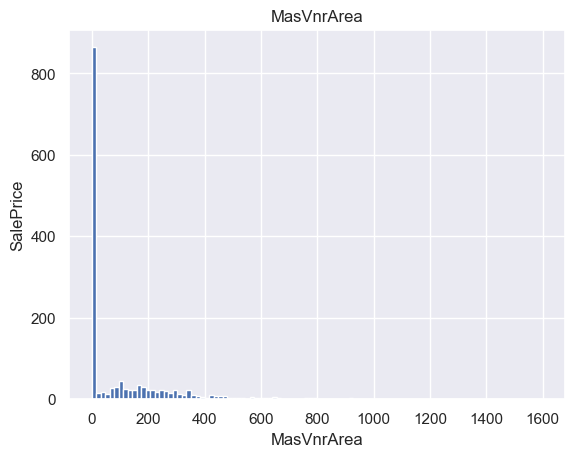

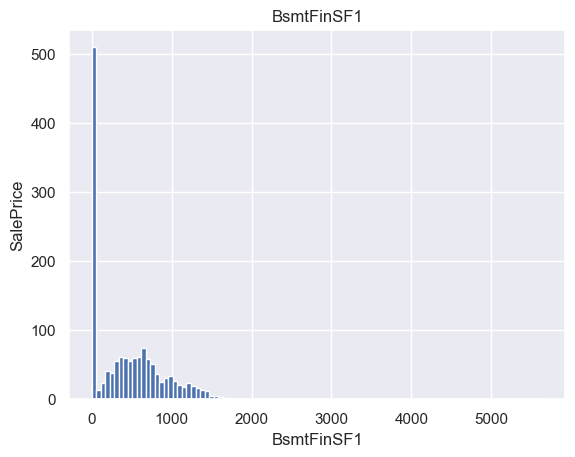

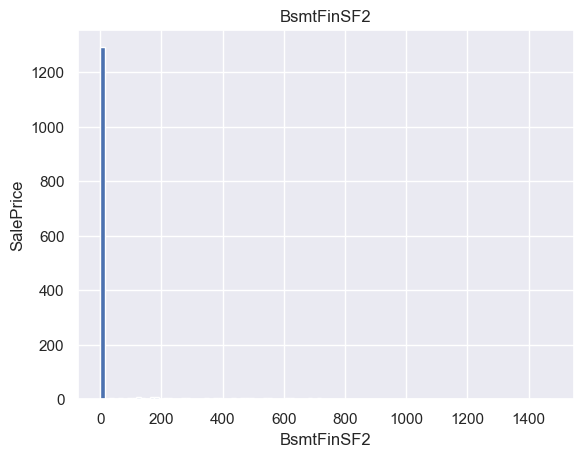

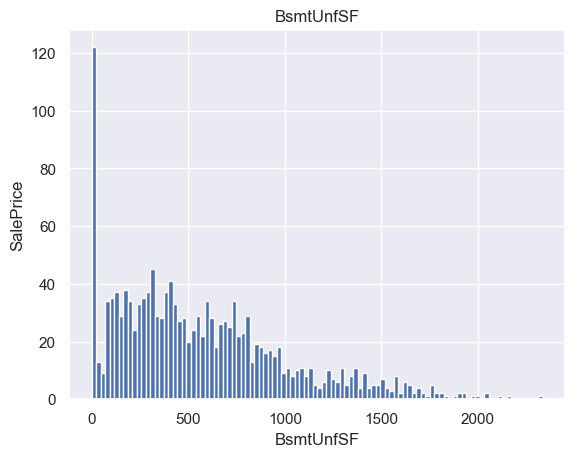

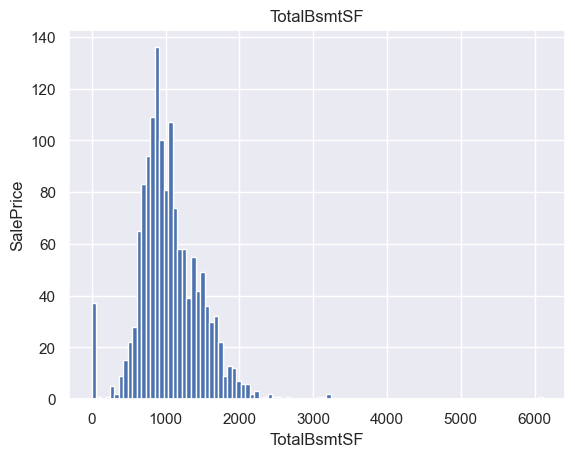

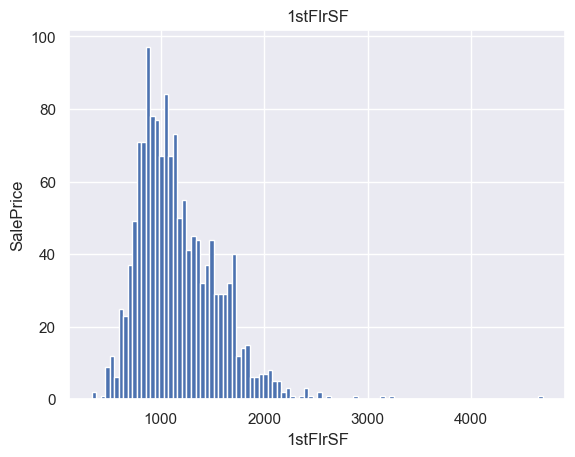

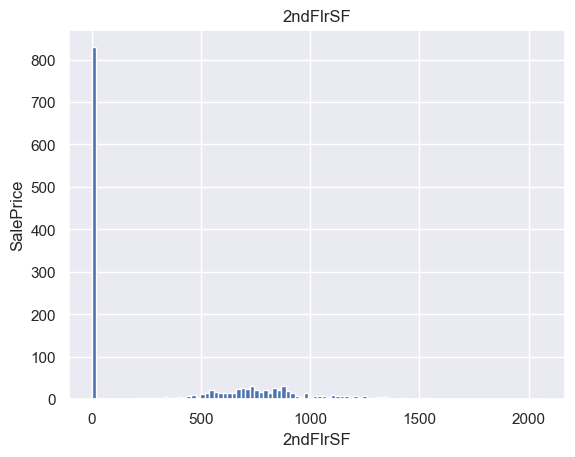

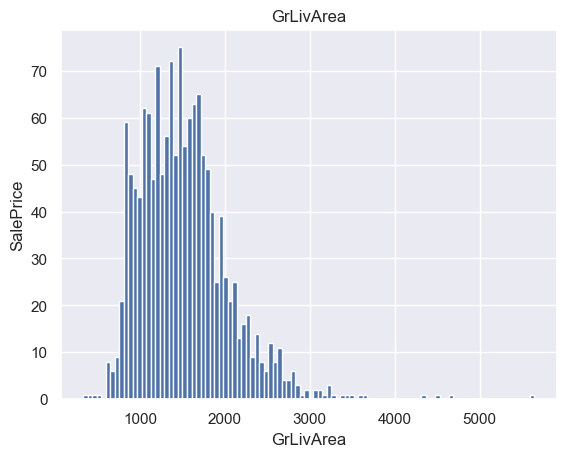

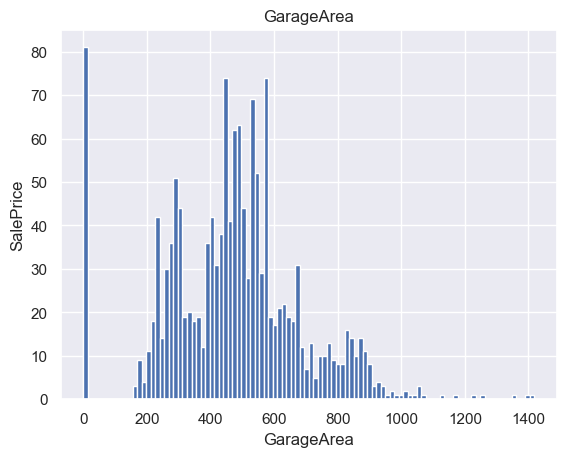

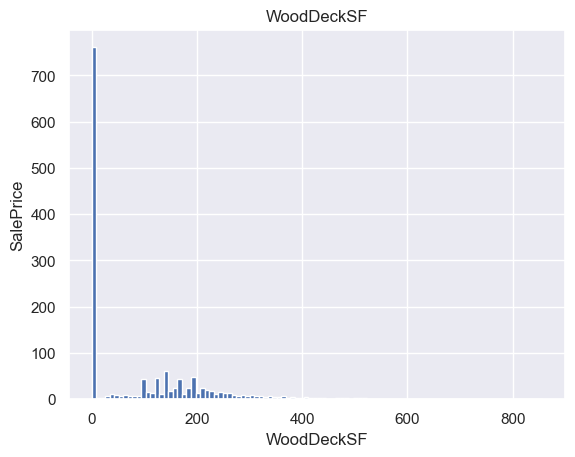

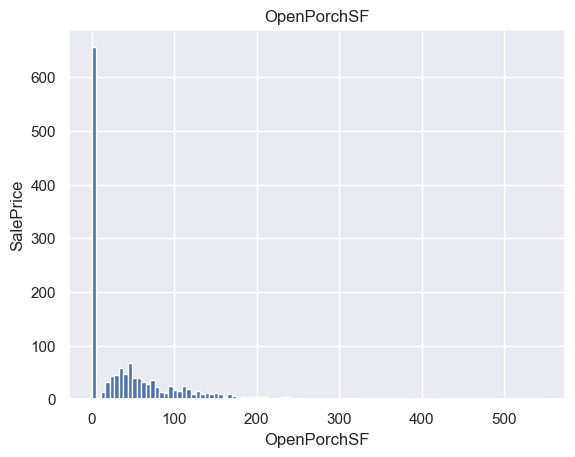

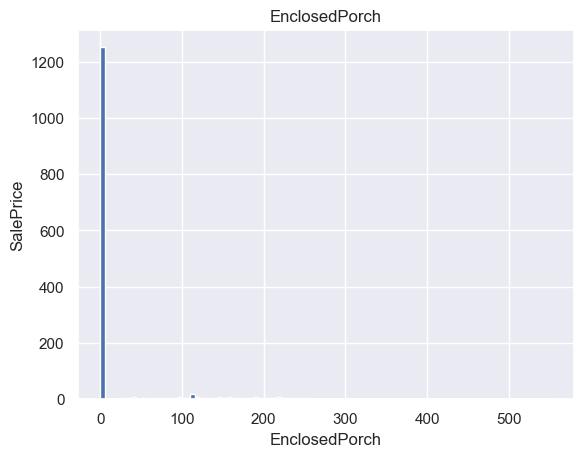

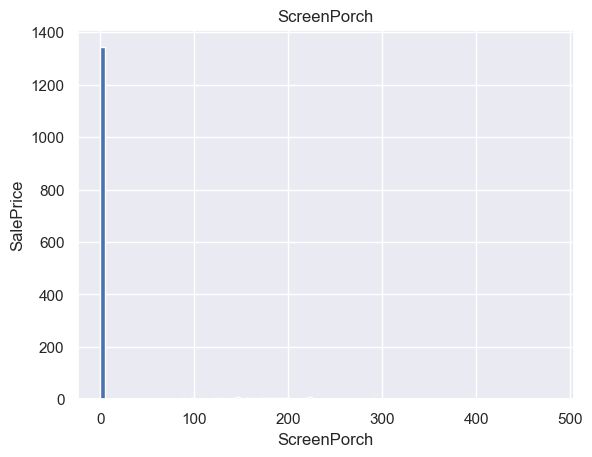

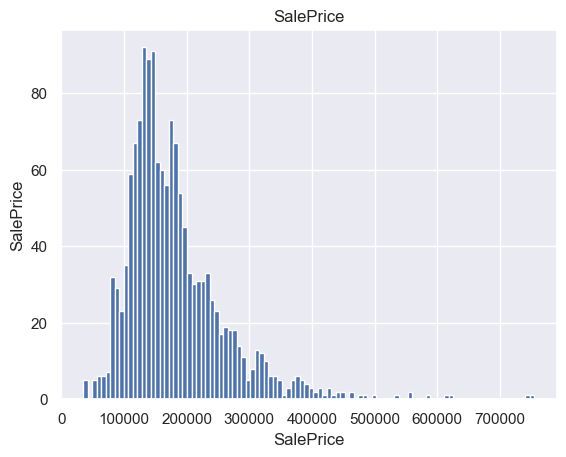

In [36]:
for i in continious_columns_train:
    data_train_cleaned[i].hist(bins=100)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

In [37]:
date_columns_train = [i for i in data_train_cleaned.columns if 'Yr' in i or 'Year' in i]

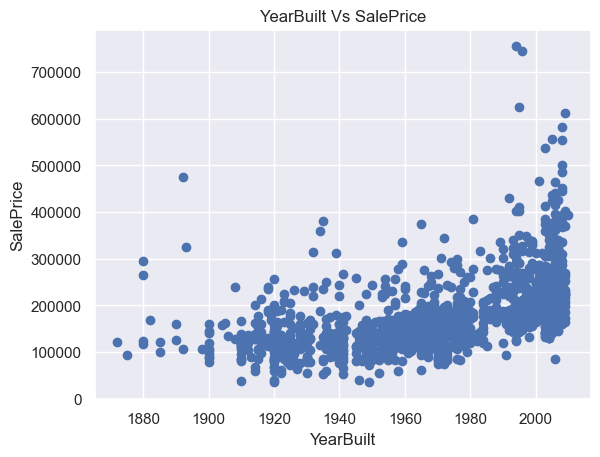

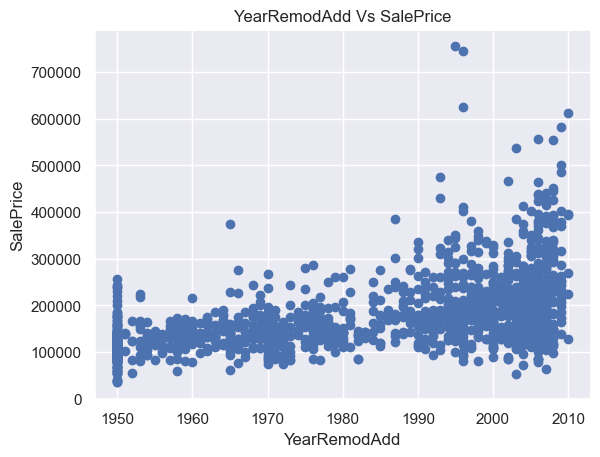

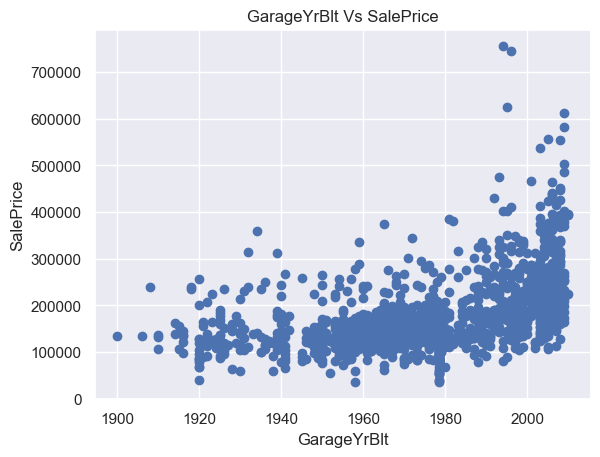

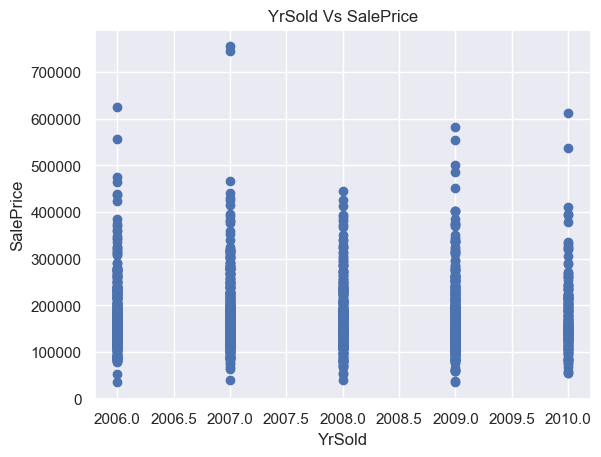

In [38]:
for i in date_columns_train:
    plt.scatter(data_train_cleaned[i],data_train_cleaned['SalePrice'])
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title('{} Vs SalePrice'.format(i))
    plt.show()

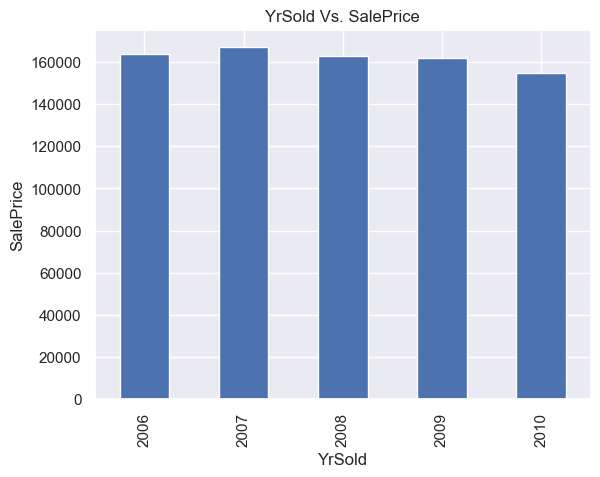

In [39]:
data_train_cleaned.groupby(by='YrSold')['SalePrice'].median().plot.bar()
plt.xlabel('YrSold')
plt.ylabel('SalePrice')
plt.title('YrSold Vs. SalePrice')
plt.show()

In [40]:
categorical_columns_train = [i for i in data_train_cleaned.columns if data_train_cleaned[i].dtypes == 'object']

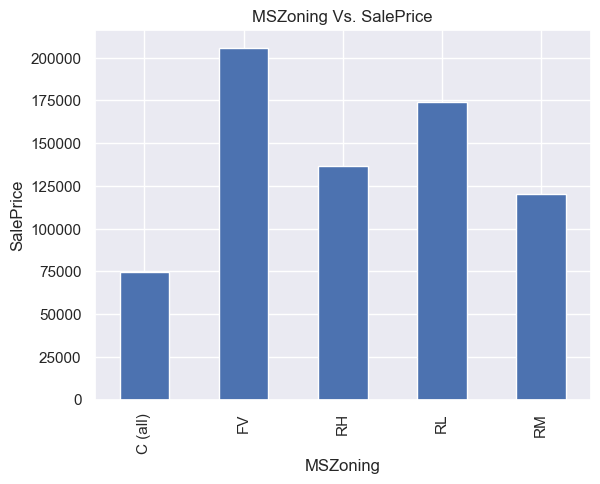

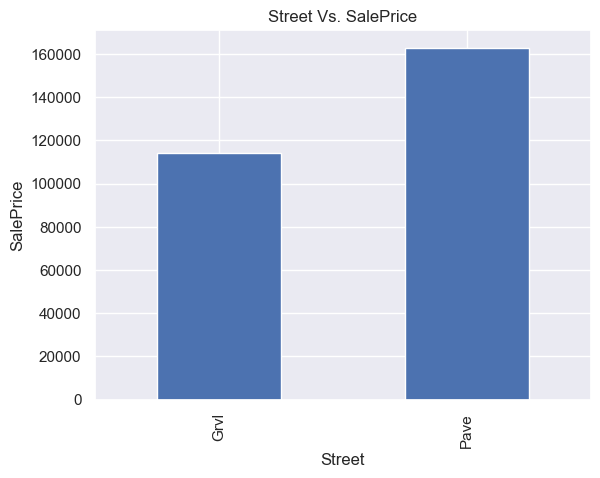

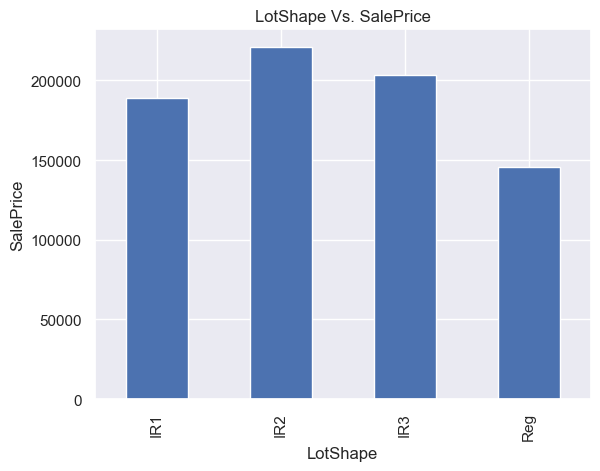

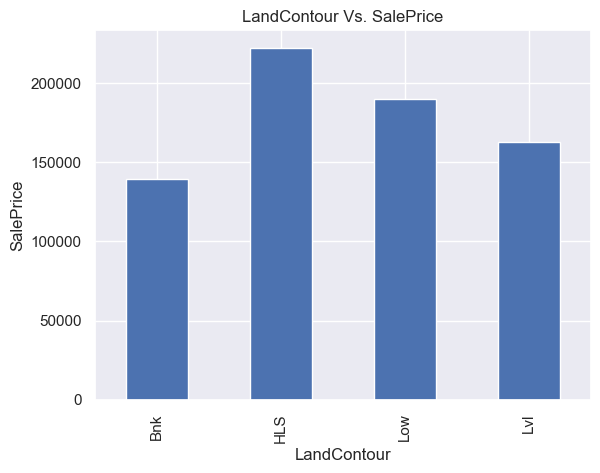

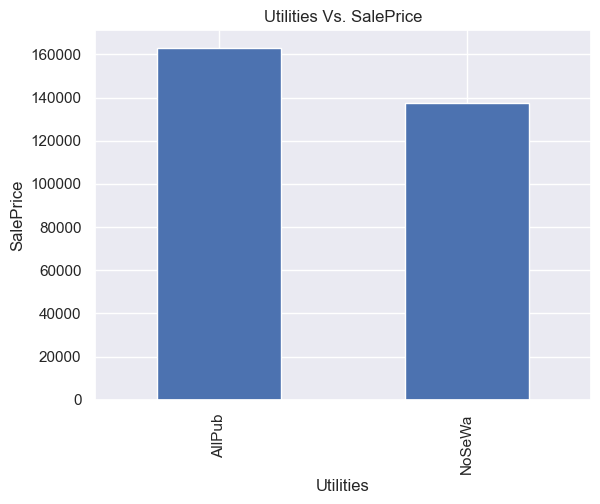

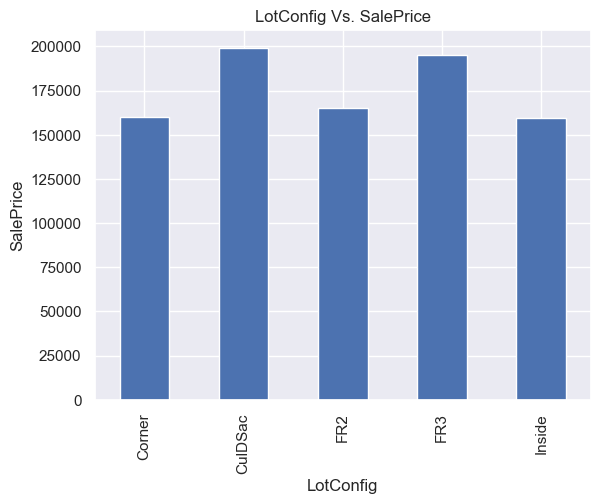

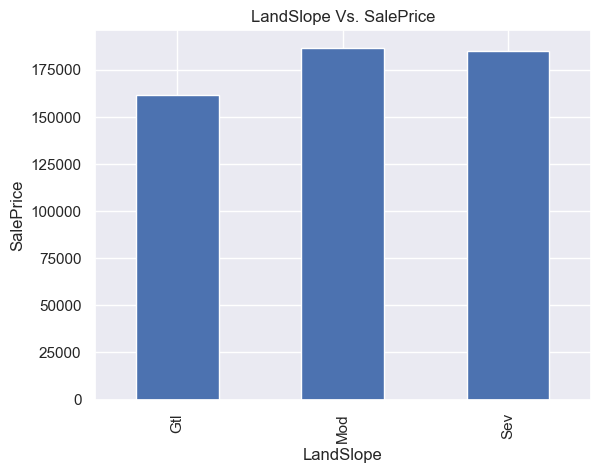

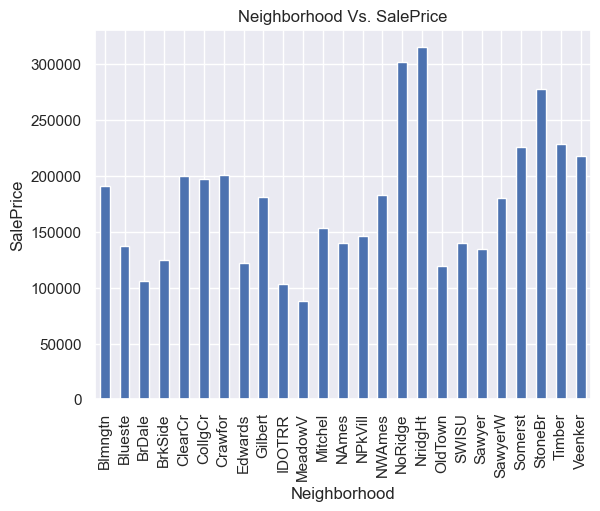

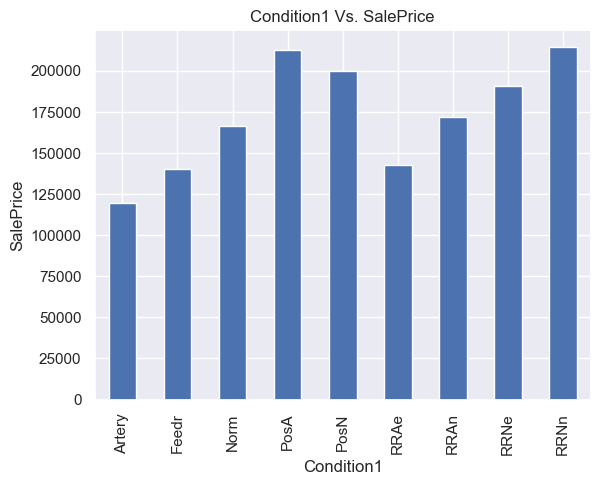

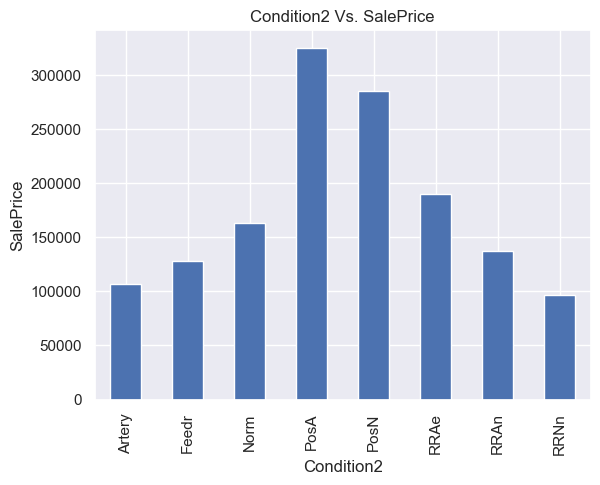

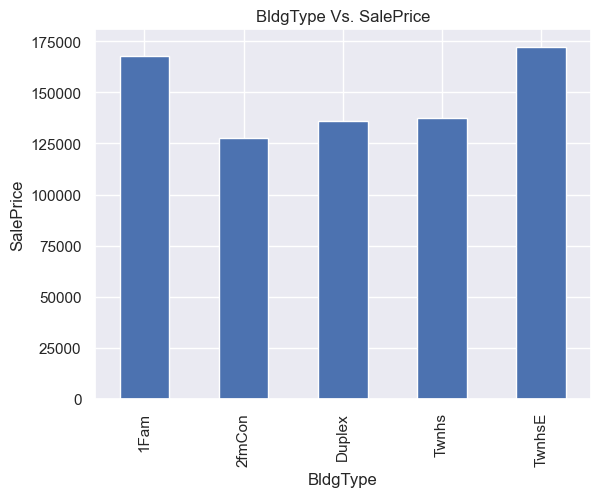

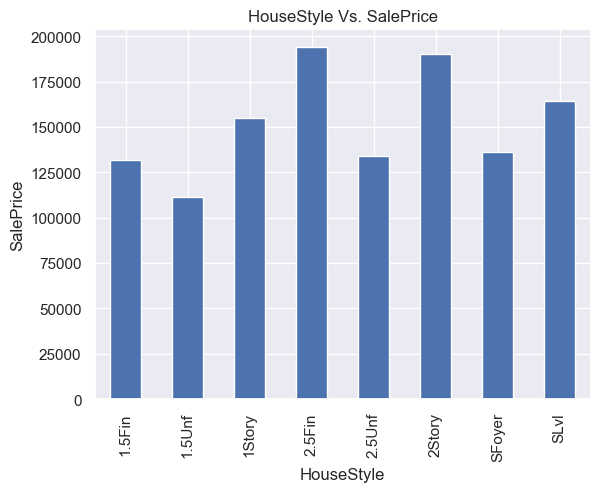

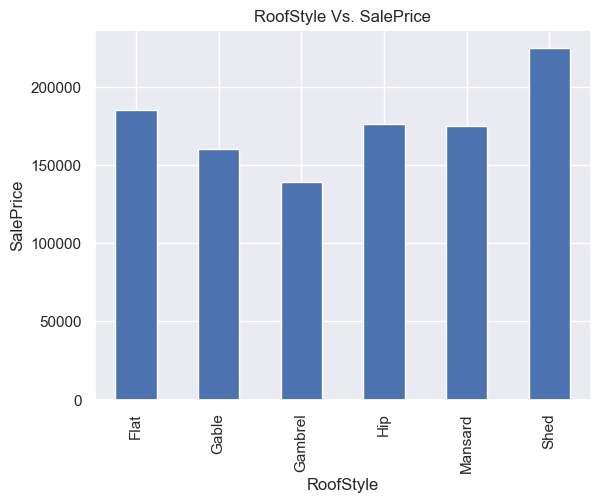

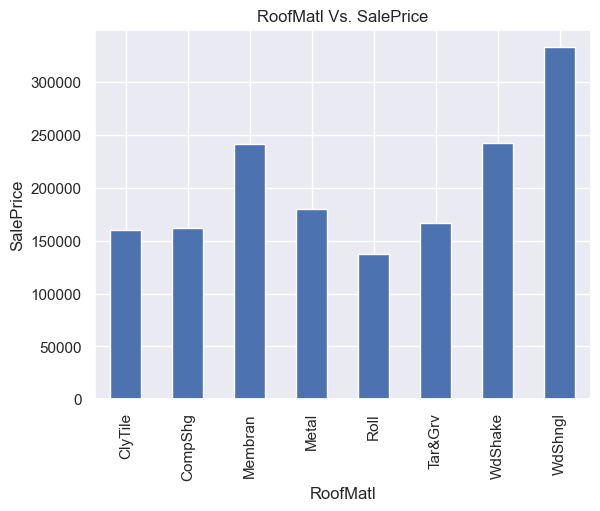

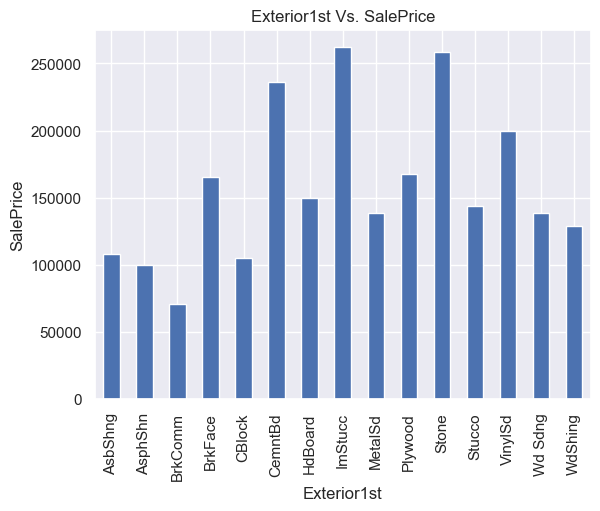

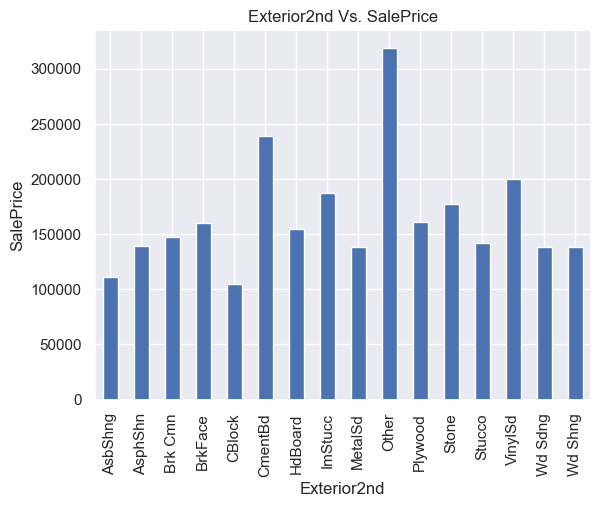

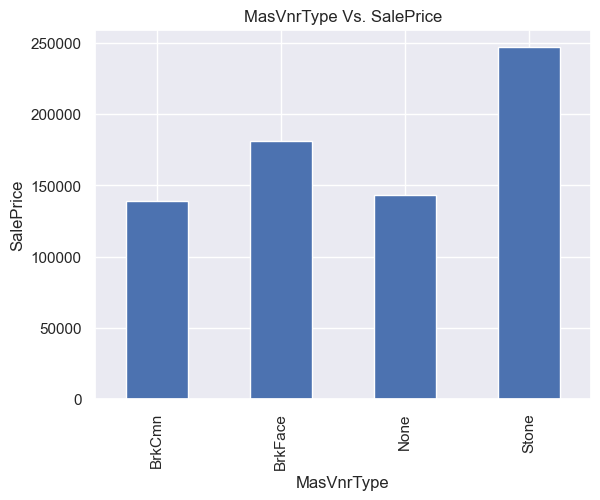

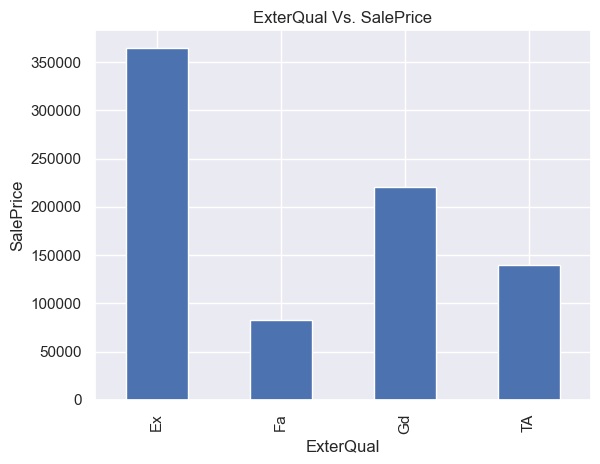

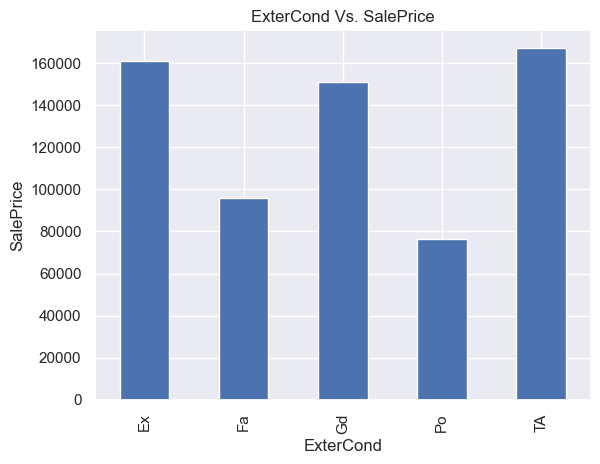

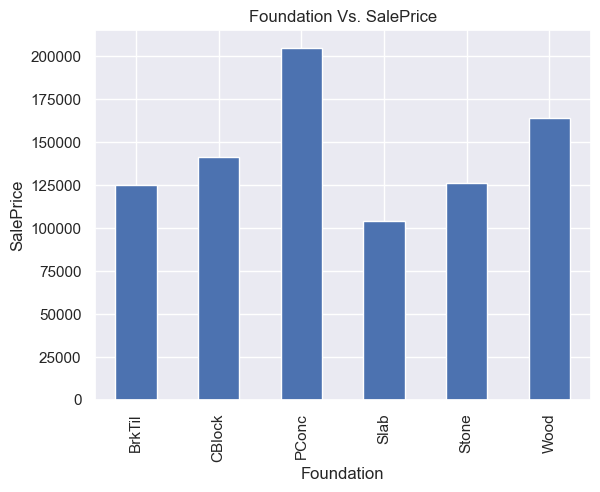

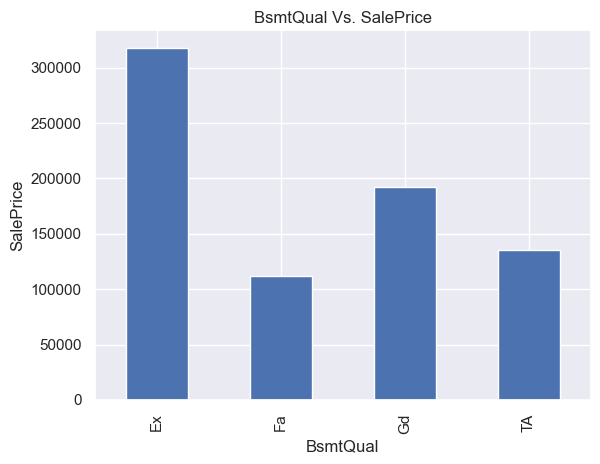

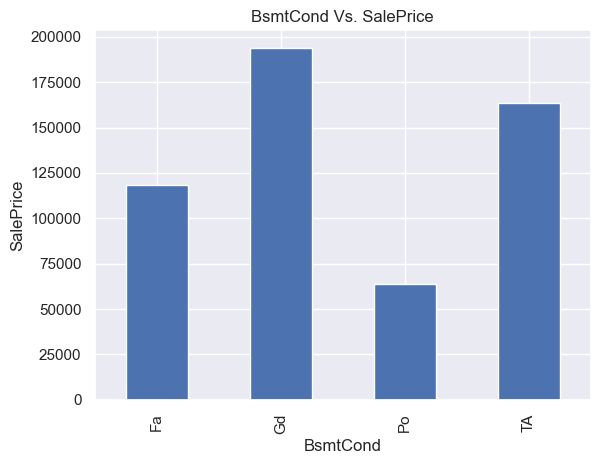

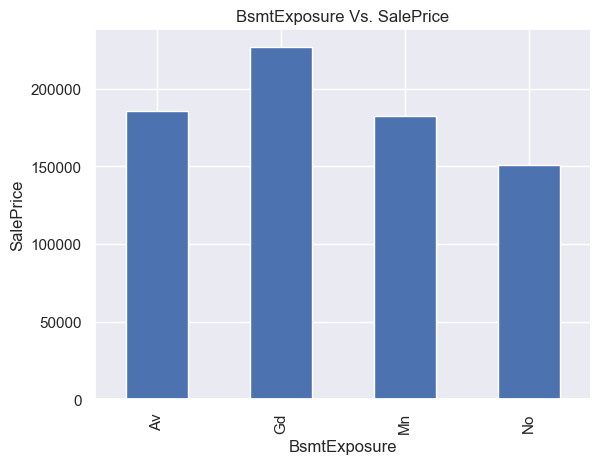

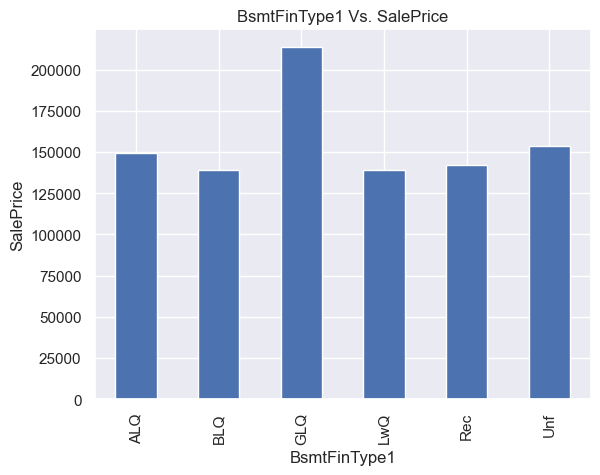

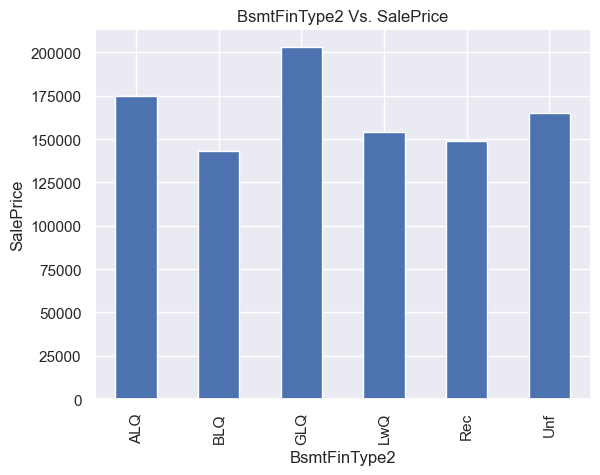

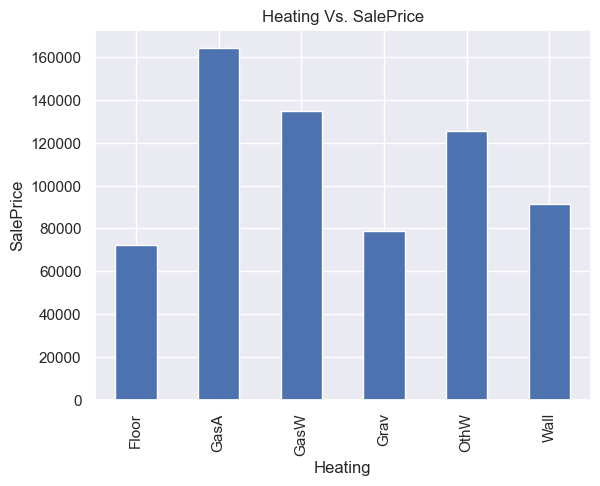

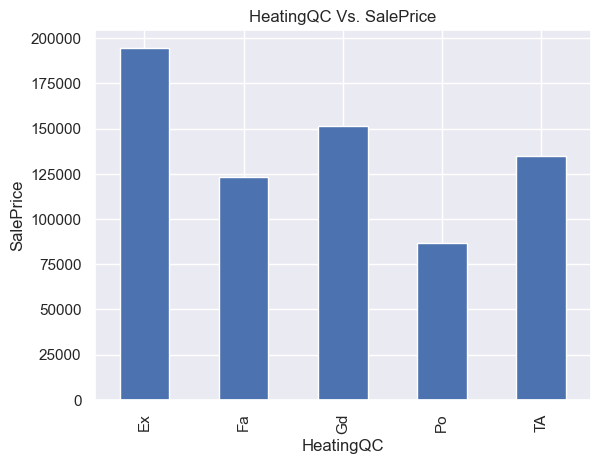

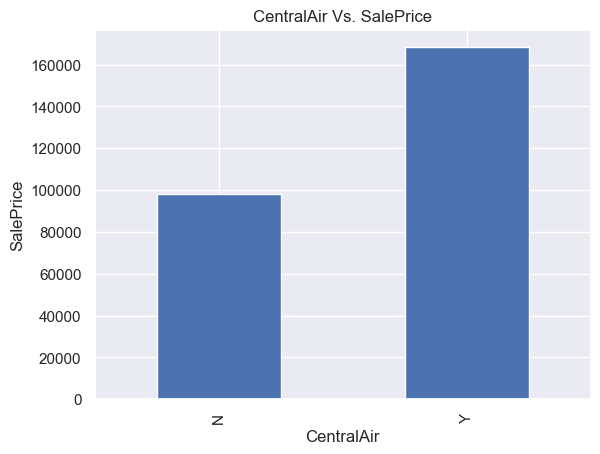

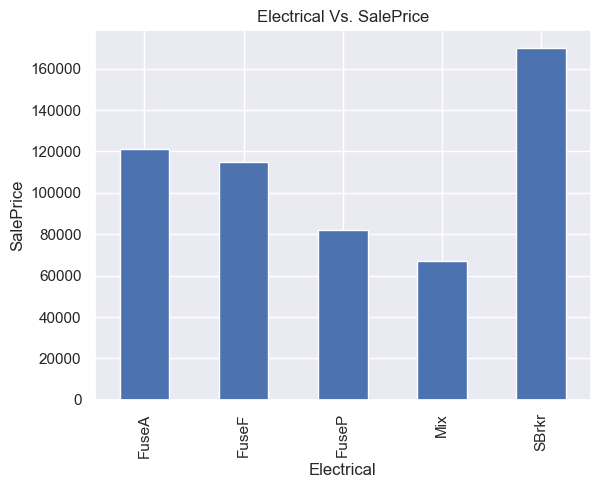

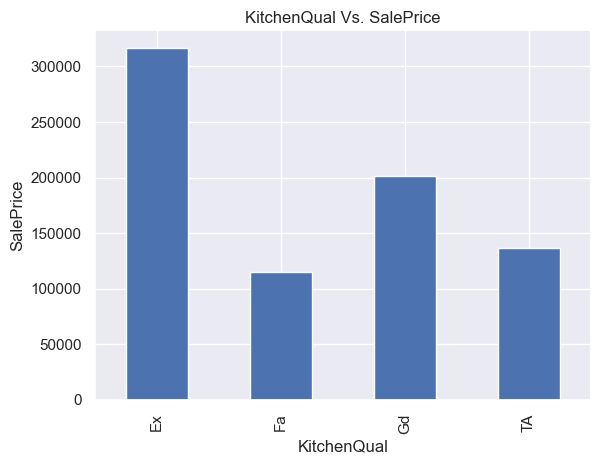

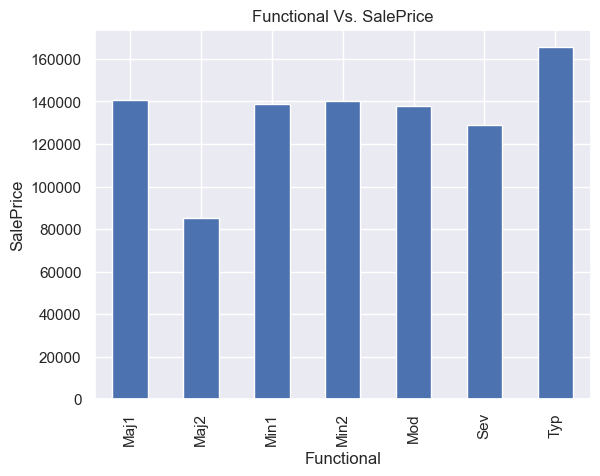

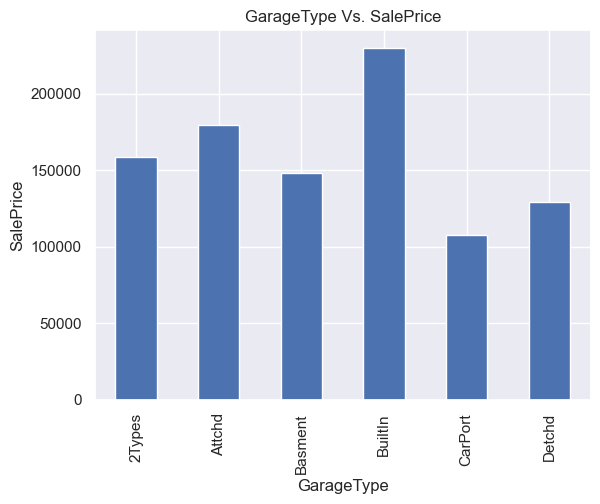

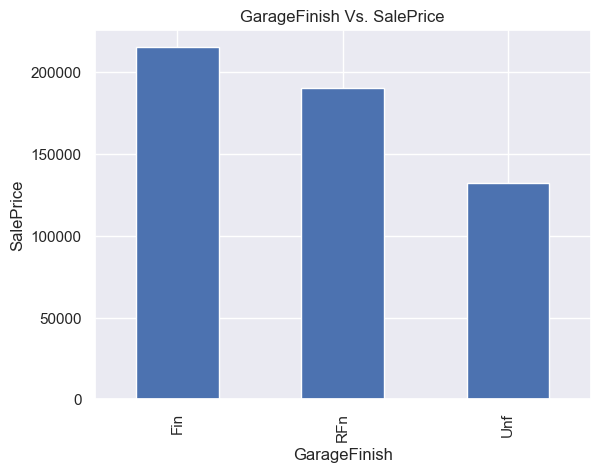

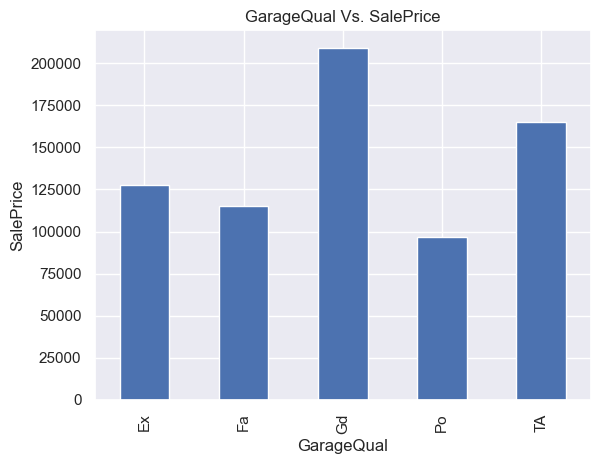

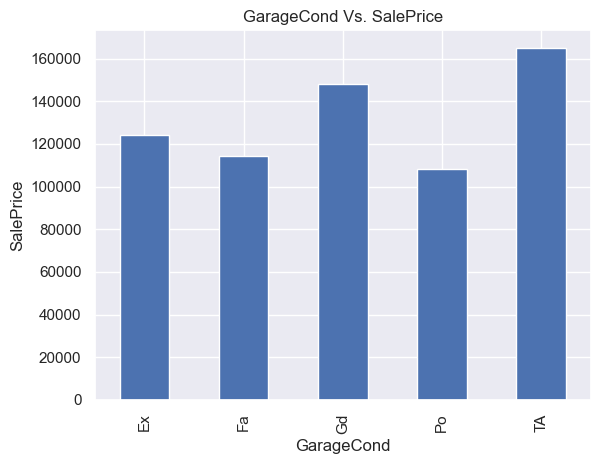

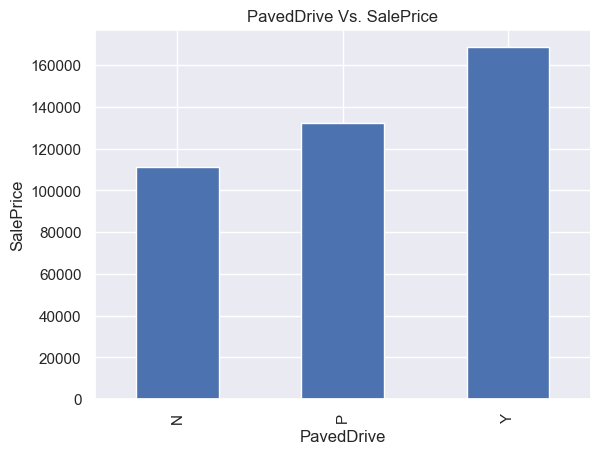

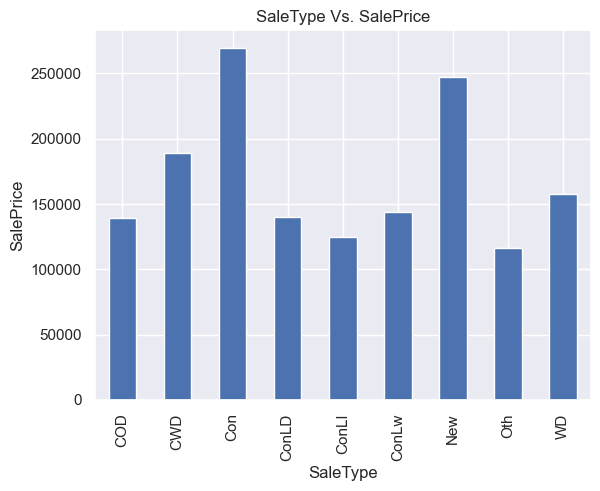

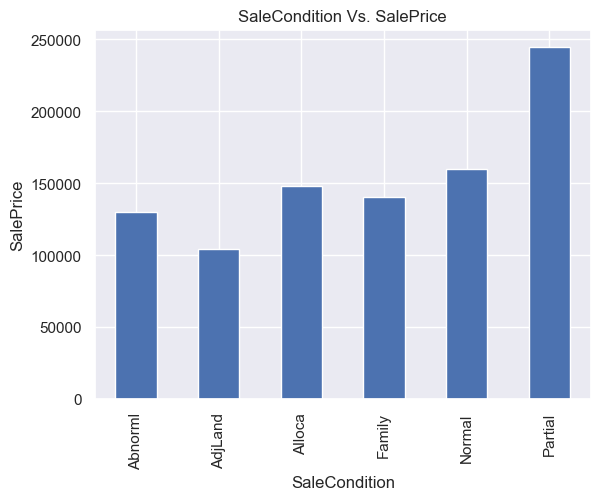

In [41]:
for i in categorical_columns_train:
    data_train_cleaned.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title('{} Vs. SalePrice'.format(i))
    plt.show()

In [42]:
for i in categorical_columns_train:
    print('{} contains {} categories'.format(i,len(data_train_cleaned[i].unique())))

MSZoning contains 5 categories
Street contains 2 categories
LotShape contains 4 categories
LandContour contains 4 categories
Utilities contains 2 categories
LotConfig contains 5 categories
LandSlope contains 3 categories
Neighborhood contains 25 categories
Condition1 contains 9 categories
Condition2 contains 8 categories
BldgType contains 5 categories
HouseStyle contains 8 categories
RoofStyle contains 6 categories
RoofMatl contains 8 categories
Exterior1st contains 15 categories
Exterior2nd contains 16 categories
MasVnrType contains 4 categories
ExterQual contains 4 categories
ExterCond contains 5 categories
Foundation contains 6 categories
BsmtQual contains 4 categories
BsmtCond contains 4 categories
BsmtExposure contains 4 categories
BsmtFinType1 contains 6 categories
BsmtFinType2 contains 6 categories
Heating contains 6 categories
HeatingQC contains 5 categories
CentralAir contains 2 categories
Electrical contains 5 categories
KitchenQual contains 4 categories
Functional contains 7

In [43]:
categorical_features = [i for i in categorical_columns_train if len(data_train_cleaned[i].unique()) <= 4]

### Most Correlated features

In [44]:
correlation = data_train_cleaned.corr()
k = 10
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
corr_feat = pd.DataFrame(cols)
corr_feat.columns = ['Most Correlated Features']
corr_feat

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


<AxesSubplot:>

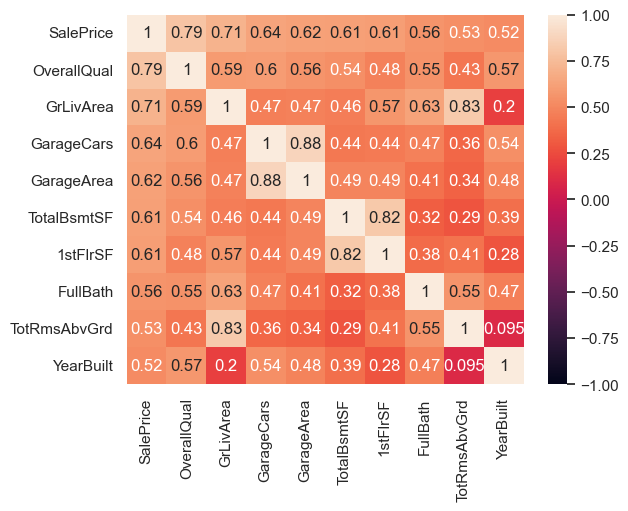

In [45]:
sns.heatmap(data_train_cleaned[cols].corr(),vmin=-1,vmax=1,annot=True)

In [46]:
data_train_cleaned.columns[data_train_cleaned.dtypes == 'float64']

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [47]:
for i in data_train_cleaned.columns[data_train_cleaned.dtypes == 'float64'] :
    print(data_train_cleaned[i].value_counts())

70.049958     259
60.000000     143
70.000000      70
80.000000      69
50.000000      57
             ... 
137.000000      1
38.000000       1
33.000000       1
150.000000      1
46.000000       1
Name: LotFrontage, Length: 111, dtype: int64
0.000000      860
103.685262      8
72.000000       8
108.000000      8
180.000000      8
             ... 
562.000000      1
89.000000       1
921.000000      1
762.000000      1
119.000000      1
Name: MasVnrArea, Length: 328, dtype: int64
1978.506164    81
2005.000000    65
2006.000000    59
2004.000000    53
2003.000000    50
               ..
1927.000000     1
1900.000000     1
1906.000000     1
1908.000000     1
1933.000000     1
Name: GarageYrBlt, Length: 98, dtype: int64


In [48]:
features = list(cols)+categorical_features

In [49]:
data_train_cleaned = data_train_cleaned[features]

In [52]:
data_train_cleaned.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive'],
      dtype='object')

In [53]:
data_test_cleaned = data_test_cleaned[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive']]

In [54]:
data_train_cleaned = data_train_cleaned[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LandSlope',
       'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'CentralAir', 'KitchenQual', 'GarageFinish', 'PavedDrive','SalePrice']]

In [61]:
main_train = data_train_cleaned.drop('SalePrice', axis = 1)

In [78]:
final_data = pd.concat([main_train,data_test_cleaned],axis=0)

## Converting Categorical Data

In [79]:
final_data = pd.get_dummies(final_data,drop_first=True)

In [124]:
train_data = final_data.iloc[:1459,:]
test_data = final_data.iloc[1459:,:]

In [126]:
train_data['SalePrice'] = data_train_cleaned['SalePrice']

C:\Users\Amro Ewes\AppData\Local\Temp\ipykernel_50536\2841622977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['SalePrice'] = data_train_cleaned['SalePrice']


## Model 2 XGBoost

In [127]:
inputs = train_data.drop('SalePrice',axis=1)
target = train_data['SalePrice']

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=365)

In [131]:
import xgboost as xgb

In [132]:
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [133]:
prediction = model.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [135]:
from math import sqrt

In [136]:
rmse = np.sqrt(mean_squared_error(y_test, prediction))
print("RMSE: %f" % (rmse))

RMSE: 27233.280529


In [143]:
r2_score(y_test,prediction)

0.8963774598645043

## Testing the model

In [137]:
test_submission = model.predict(test_data)

## Submission

In [138]:
import pickle
filename = 'trainedmodel.pkl'
pickle.dump(model,open(filename,'wb'))

In [139]:
submission2 = pd.DataFrame({'Id':test_data.index,'SalePrice':test_submission})

In [140]:
submission2.to_csv('submition_2.csv',index=False)

## Model 2 (XGBoost with GridCv) to find best parameters

In [144]:
from sklearn.model_selection import RandomizedSearchCV, KFold,GridSearchCV

In [145]:
params = { 'max_depth': [6,10,50],
          'learning_rate': [0.01, 0.02, 0.05],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.7, 1.0]}

xgb_reg = xgb.XGBRegressor(seed=20)

xgb_grid = GridSearchCV(estimator=xgb_reg, param_grid=params, cv=2)

xgb_grid.fit(x_train,y_train)

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat..._step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'colsample_bytree': [0.7, 1.0],
                         'learning_rate': [0.01, 0.02, 0.05],
                         'max_depth': [6, 10, 50],
                         'n_estimators': [100, 500, 1000]})

In [148]:
pred = xgb_grid.predict(x_test)
R2 = r2_score(y_test,pred)
MSE = mean_squared_error(y_test,pred)
RMSE = sqrt(MSE)
print('-'*10+'XGB'+'-'*10)
print('R square Accuracy: ',R2)
print('Mean Squared Error Accuracy: ',MSE)
print('Root Mean Squared Error: ',RMSE)

----------XGB----------
R square Accuracy:  0.9008686952308402
Mean Squared Error Accuracy:  709506711.2163107
Root Mean Squared Error:  26636.56718153281


In [149]:
test_submission_2 = xgb_grid.predict(test_data)

In [150]:
import pickle
filename = 'trainedmodel_2.pkl'
pickle.dump(model,open(filename,'wb'))

In [151]:
submission3 = pd.DataFrame({'Id':test_data.index,'SalePrice':test_submission_2})

In [152]:
submission3.to_csv('submition_3.csv',index=False)